In [1]:
from sympy import *
from sympy.utilities.lambdify import lambdify, implemented_function
import math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## Definindo as variaveis simbolicas
# Generalizadas e secundárias
q1, q2, A1, A2, t1, t2  = symbols('q_1 q_2 A_1 A_2 theta_1 theta_2')  
# Constantes do loop 1
Csx, Csy, B1, C1, Cl3, bl1 = symbols('C_{SX} C_{SY} B_1 C_1 C_{L3} beta_L1')
# Constantes do loop 2
Cl4, bl13, B2, C2, Cb2, bb12, Cl1 = symbols('C_{L4} beta_L13 B_2 C_2 C_{B2} beta_B12 C_{L1}')
# Constante para ponto de interesse
Cb1 = symbols("C_{B1}")


q1d, q2d, q1dd, q2dd = symbols('\dot{q_1} \dot{q_2} \ddot{q_1} \ddot{q_2}')
Ka11, Ka12, Ka21, Ka22, Kt11, Kt12, Kt21, Kt22 = symbols('K_{A11}, K_{A12}, K_{A21}, K_{A22}, K_{t11}, K_{t12}, K_{t21}, K_{t22}')
L1a11, L1a12, L1a21, L1a22, L2a11, L2a12, L2a21, L2a22 = symbols('L_{1A11} L_{1A12} L_{1A21} L_{1A22} L_{2A11} L_{2A12} L_{2A21} L_{2A22}')

# Para calculos com lambdify
q1ds, q2ds, q1dds, q2dds = symbols('q1d q2d q1dd q2dd')

# Ponto de interesse
# Up, Vp = symbols('U_p V_p')

# ## Definindo as funções simbólicas
A1q = Function('A_1')(q1,q2)
A2q = Function('A_2')(q1,q2)
t1q = Function('theta_1')(q1,q2)
t2q = Function('theta_2')(q1,q2)

Ka11q = Function('K_{A11}')(q1,q2)
Ka12q = Function('K_{A12}')(q1,q2)
Ka21q = Function('K_{A21}')(q1,q2)
Ka22q = Function('K_{A22}')(q1,q2)
Kt11q = Function('K_{t11}')(q1,q2)
Kt12q = Function('K_{t12}')(q1,q2)
Kt21q = Function('K_{t21}')(q1,q2)
Kt22q = Function('K_{t22}')(q1,q2)

# La11, La12, La21, La22 = symbols('L_{A11} L_{A12} L_{A21} L_{A22}')

In [9]:
# Valores das constantes
Csxv = 215.0
Csyv = 345.0
C1v = 941.0
C2v = 995.0
B1v = 900.0
B2v = 900.0
Cl1v = 2866
Cl3v = 1415.0
Cl4v = 1858.0
bl1v = math.radians(15.2)
bl13v = math.radians(15.2+12.0)
Cb2v = 432.0
bb12v = math.radians(77.0+73.0)
valores = [(Csx, Csxv), (Csy, Csyv), (C1, C1v), (C2, C2v), (B1, B1v), (B2, B2v), (Cl1, Cl1v), (Cl3, Cl3v), (Cl4, Cl4v), (bl1, bl1v), (bl13, bl13v), (Cb2, Cb2v), (bb12, bb12v)]


In [10]:
valores

[(C_{SX}, 215.0),
 (C_{SY}, 345.0),
 (C_1, 941.0),
 (C_2, 995.0),
 (B_1, 900.0),
 (B_2, 900.0),
 (C_{L1}, 2866),
 (C_{L3}, 1415.0),
 (C_{L4}, 1858.0),
 (beta_L1, 0.26529004630313807),
 (beta_L13, 0.47472955654245763),
 (C_{B2}, 432.0),
 (beta_B12, 2.6179938779914944)]

In [11]:
## Definindo as funções de loop e os vetores das variáveis:

f1 = Csx + (B1 + C1 - q1)*cos(t1) - Cl3*cos(A1+bl1)
f2 = (B1 + C1 - q1)*sin(t1) - Cl3*sin(A1+bl1) - Csy
f3 = Cl4*cos(A1+bl13) + (B2+C2-q2)*cos(t2) - Cb2*cos(A2 - bb12 - pi) - Cl1*cos(A1)
f4 = Cl4*sin(A1+bl13) + (B2+C2-q2)*sin(t2) - Cb2*sin(A2 - bb12 - pi) - Cl1*sin(A1)

F = Matrix([f1, f2, f3, f4])
S = Matrix([A1, A2, t1, t2])
q = Matrix([q1, q2])
qd = Matrix([q1d, q2d])
qdd = Matrix([q1dd, q2dd])

display(F, S, q, qd, qdd)


Matrix([
[                                      -C_{L3}*cos(A_1 + beta_L1) + C_{SX} + (B_1 + C_1 - q_1)*cos(theta_1)],
[                                      -C_{L3}*sin(A_1 + beta_L1) - C_{SY} + (B_1 + C_1 - q_1)*sin(theta_1)],
[C_{B2}*cos(A_2 - beta_B12) - C_{L1}*cos(A_1) + C_{L4}*cos(A_1 + beta_L13) + (B_2 + C_2 - q_2)*cos(theta_2)],
[C_{B2}*sin(A_2 - beta_B12) - C_{L1}*sin(A_1) + C_{L4}*sin(A_1 + beta_L13) + (B_2 + C_2 - q_2)*sin(theta_2)]])

Matrix([
[    A_1],
[    A_2],
[theta_1],
[theta_2]])

Matrix([
[q_1],
[q_2]])

Matrix([
[\dot{q_1}],
[\dot{q_2}]])

Matrix([
[\ddot{q_1}],
[\ddot{q_2}]])

In [12]:
F.subs(valores)

Matrix([
[                                            (1841.0 - q_1)*cos(theta_1) - 1415.0*cos(A_1 + 0.265290046303138) + 215.0],
[                                            (1841.0 - q_1)*sin(theta_1) - 1415.0*sin(A_1 + 0.265290046303138) - 345.0],
[(1895.0 - q_2)*cos(theta_2) - 2866*cos(A_1) + 1858.0*cos(A_1 + 0.474729556542458) + 432.0*cos(A_2 - 2.61799387799149)],
[(1895.0 - q_2)*sin(theta_2) - 2866*sin(A_1) + 1858.0*sin(A_1 + 0.474729556542458) + 432.0*sin(A_2 - 2.61799387799149)]])

## Análise da velocidade

$\{\dot{S}\} = [J]^{-1}[b]\{\dot{q}\}$

$\{\dot{S}\} = [K]\{\dot{q}\}$

In [5]:
# Análise de velocidade:
J = F.jacobian(S)
b = - F.jacobian(q)
# K = simplify(J.inv()*b)

# display(J, b, K)
display(J,b)

Matrix([
[                    C_{L3}*sin(A_1 + beta_L1),                           0, -(B_1 + C_1 - q_1)*sin(theta_1),                               0],
[                   -C_{L3}*cos(A_1 + beta_L1),                           0,  (B_1 + C_1 - q_1)*cos(theta_1),                               0],
[ C_{L1}*sin(A_1) - C_{L4}*sin(A_1 + beta_L13), -C_{B2}*sin(A_2 - beta_B12),                               0, -(B_2 + C_2 - q_2)*sin(theta_2)],
[-C_{L1}*cos(A_1) + C_{L4}*cos(A_1 + beta_L13),  C_{B2}*cos(A_2 - beta_B12),                               0,  (B_2 + C_2 - q_2)*cos(theta_2)]])

Matrix([
[cos(theta_1),            0],
[sin(theta_1),            0],
[           0, cos(theta_2)],
[           0, sin(theta_2)]])

In [ ]:
print(latex(b))

In [ ]:
# Código mais rápido na célula abaixo
# K = simplify(J.inv()*b)

# display(K)

In [6]:
k1 = simplify(J[[0,1],[0,2]].inv()*b[:2,0])
b2 = (-J[[2,3],0]).row_join(b[[2,3],1])
k21 = simplify(J[[2,3],[1,3]].inv()*(-J[[2,3],0])*k1[0])
k22 = simplify(J[[2,3],[1,3]].inv()*b[[2,3],1])
K = Matrix([[k1[0],0],[k21[0],k22[0]], [k1[1],0],[k21[1],k22[1]]])
K

Matrix([
[                                                                                                                                                                                           1/(C_{L3}*sin(A_1 + beta_L1 - theta_1)),                                                     0],
[                                                                                   (-C_{L1}*sin(A_1 - theta_2) + C_{L4}*sin(A_1 + beta_L13 - theta_2))/(C_{B2}*C_{L3}*sin(A_1 + beta_L1 - theta_1)*sin(-A_2 + beta_B12 + theta_2)),             1/(C_{B2}*sin(-A_2 + beta_B12 + theta_2))],
[                                                                                                                                                                                1/((B_1 + C_1 - q_1)*tan(A_1 + beta_L1 - theta_1)),                                                     0],
[2*(C_{L1}*sin(A_1 - A_2 + beta_B12) - C_{L4}*sin(A_1 - A_2 + beta_B12 + beta_L13))/(C_{L3}*(-cos(A_1 - A_2 + beta_B12 + beta_L1 - theta

## Análise da aceleração

$\{\ddot{S}\} = [K]\{\ddot{q}\} + ([L_1]\dot{q_1} + [L_2]\dot{q_2})\{\dot{q}\}$

$[L_1] = \frac{\partial [K]}{\partial q_1}$

$[L_2] = \frac{\partial [K]}{\partial q_2}$

In [13]:
# Análise de aceleração
Kl = K.subs([(A1, A1q), (A2, A2q), (t1, t1q), (t2, t2q)])
display(Kl)

Matrix([
[                                                                                                                                                                                                                                                                                              1/(C_{L3}*sin(beta_L1 + A_1(q_1, q_2) - theta_1(q_1, q_2))),                                                                        0],
[                                                                                                                           (-C_{L1}*sin(A_1(q_1, q_2) - theta_2(q_1, q_2)) + C_{L4}*sin(beta_L13 + A_1(q_1, q_2) - theta_2(q_1, q_2)))/(C_{B2}*C_{L3}*sin(beta_B12 - A_2(q_1, q_2) + theta_2(q_1, q_2))*sin(beta_L1 + A_1(q_1, q_2) - theta_1(q_1, q_2))),             1/(C_{B2}*sin(beta_B12 - A_2(q_1, q_2) + theta_2(q_1, q_2)))],
[                                                                                                                                                

In [14]:
L1 = Kl.diff(q1)
L1 = L1.subs([(diff(A1q,q1), Ka11), (diff(A2q,q1), Ka21), (diff(t1q,q1), Kt11), (diff(t2q,q1), Kt21)])
L1 = L1.subs([(A1q, A1), (A2q, A2), (t1q, t1), (t2q, t2)])
L1 = L1.subs([(Ka12, 0), (Kt12, 0)])


L2 = Kl.diff(q2)
L2 = L2.subs([(diff(A1q,q2), Ka12), (diff(A2q,q2), Ka22), (diff(t1q,q2), Kt12), (diff(t2q,q2), Kt22)])
L2 = L2.subs([(A1q, A1), (A2q, A2), (t1q, t1), (t2q, t2)])
L2 = L2.subs([(Ka12, 0), (Kt12, 0)])


display(L1,L2)

Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              -(K_{A11} - K_{t11})*cos(A_1 + beta_L1 - theta_1)/(C_{L3}*sin(A_1 + beta_L1 - theta_1)**2),                                                                                                                  0],
[                                                                                                                 -(K_{A11} - K_{t11})*(-C_{L1}*sin(A_1 - theta_2) + C_{L4}*sin

Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 0,                                                                                                                           

In [ ]:
print(latex(L1[3,1]))

In [ ]:
# L2s = simplify(L2.subs([(Ka12,K[0,1]), (Ka22,K[1,1]), (Kt12,K[2,1]), (Kt22, K[3,1])]))
# L2s = simplify(L2)
# display(L1s)
# display(L2s)


In [15]:
Sd = K*qd
Sdd = K*qdd + (L1*q1d + L2*q2d)*qd

display(Sd, Sdd)

Matrix([
[                                                                                                                                                                                                                                                             \dot{q_1}/(C_{L3}*sin(A_1 + beta_L1 - theta_1))],
[                                                                                               \dot{q_2}/(C_{B2}*sin(-A_2 + beta_B12 + theta_2)) + \dot{q_1}*(-C_{L1}*sin(A_1 - theta_2) + C_{L4}*sin(A_1 + beta_L13 - theta_2))/(C_{B2}*C_{L3}*sin(A_1 + beta_L1 - theta_1)*sin(-A_2 + beta_B12 + theta_2))],
[                                                                                                                                                                                                                                                  \dot{q_1}/((B_1 + C_1 - q_1)*tan(A_1 + beta_L1 - theta_1))],
[-\dot{q_2}/((B_2 + C_2 - q_2)*tan(-A_2 + beta_B12 + theta_2)) + 2*\dot{q_1}*(C

Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

# Análise de ponto de interesse:

In [16]:
Xp = Cl1*cos(A1q) - Cb1*cos(A2q)
Yp = Cl1*sin(A1q) - Cb1*sin(A2q)

P = Matrix([Xp,Yp])

display(Xp, Yp)

-C_{B1}*cos(A_2(q_1, q_2)) + C_{L1}*cos(A_1(q_1, q_2))

-C_{B1}*sin(A_2(q_1, q_2)) + C_{L1}*sin(A_1(q_1, q_2))

In [17]:
# Velocidade do ponto de interesse
# Kp = P.jacobian(q).subs([(Aq.diff(q1),Ka1), (Aq.diff(q2),Ka2)]).subs([(Aq,A), (Bq, B)])
Kp = P.jacobian(q).subs([(diff(A1q,q1), Ka11), (diff(A1q,q2), Ka12), (diff(A2q,q1), Ka21), (diff(A2q,q2), Ka22)]).subs([(A1q,A1), (A2q, A2)])

display(Kp)

Matrix([
[ C_{B1}*K_{A21}*sin(A_2) - C_{L1}*K_{A11}*sin(A_1),  C_{B1}*K_{A22}*sin(A_2) - C_{L1}*K_{A12}*sin(A_1)],
[-C_{B1}*K_{A21}*cos(A_2) + C_{L1}*K_{A11}*cos(A_1), -C_{B1}*K_{A22}*cos(A_2) + C_{L1}*K_{A12}*cos(A_1)]])

In [ ]:
print(latex(Kp))

In [18]:
Kpl = Kp.subs([(Ka11, Ka11q), (Ka12, Ka12q), (Ka21, Ka21q), (Ka22, Ka22q), (A1,A1q), (A2, A2q)])
Lp1 = Kpl.diff(q1).subs([(Ka11q.diff(q1),L1a11), (Ka12q.diff(q1),L1a12), (Ka21q.diff(q1),L1a21), (Ka22q.diff(q1),L1a22)])
Lp1 = Lp1.subs([(diff(A1q,q1), Ka11), (diff(A2q,q1), Ka21)]).subs([(Ka11q, Ka11), (Ka12q, Ka12), (Ka21q, Ka21), (Ka22q, Ka22),(A1q,A1), (A2q, A2)])


Lp2 = Kpl.diff(q2).subs([(Ka11q.diff(q2),L2a11), (Ka12q.diff(q2),L2a12), (Ka21q.diff(q2),L2a21), (Ka22q.diff(q2),L2a22)])
Lp2 = Lp2.subs([(diff(A1q,q2), Ka12), (diff(A2q,q2), Ka22)]).subs([(Ka11q, Ka11), (Ka12q, Ka12), (Ka21q, Ka21), (Ka22q, Ka22),(A1q,A1), (A2q, A2)])

# Lp2 = Kpl.diff(q2).subs([(Ka11q.diff(q2),La12), (Ka2.diff(q2),La22)]).subs([(Aq.diff(q2),Ka1), (Bq.diff(q2),Kb1)]).subs([(Aq,A), (Bq, B)])

# display(Kpl)
display(Lp1)
display(Lp2)


Matrix([
[C_{B1}*K_{A21}**2*cos(A_2) + C_{B1}*L_{1A21}*sin(A_2) - C_{L1}*K_{A11}**2*cos(A_1) - C_{L1}*L_{1A11}*sin(A_1), C_{B1}*K_{A21}*K_{A22}*cos(A_2) + C_{B1}*L_{1A22}*sin(A_2) - C_{L1}*K_{A11}*K_{A12}*cos(A_1) - C_{L1}*L_{1A12}*sin(A_1)],
[C_{B1}*K_{A21}**2*sin(A_2) - C_{B1}*L_{1A21}*cos(A_2) - C_{L1}*K_{A11}**2*sin(A_1) + C_{L1}*L_{1A11}*cos(A_1), C_{B1}*K_{A21}*K_{A22}*sin(A_2) - C_{B1}*L_{1A22}*cos(A_2) - C_{L1}*K_{A11}*K_{A12}*sin(A_1) + C_{L1}*L_{1A12}*cos(A_1)]])

Matrix([
[C_{B1}*K_{A21}*K_{A22}*cos(A_2) + C_{B1}*L_{2A21}*sin(A_2) - C_{L1}*K_{A11}*K_{A12}*cos(A_1) - C_{L1}*L_{2A11}*sin(A_1), C_{B1}*K_{A22}**2*cos(A_2) + C_{B1}*L_{2A22}*sin(A_2) - C_{L1}*K_{A12}**2*cos(A_1) - C_{L1}*L_{2A12}*sin(A_1)],
[C_{B1}*K_{A21}*K_{A22}*sin(A_2) - C_{B1}*L_{2A21}*cos(A_2) - C_{L1}*K_{A11}*K_{A12}*sin(A_1) + C_{L1}*L_{2A11}*cos(A_1), C_{B1}*K_{A22}**2*sin(A_2) - C_{B1}*L_{2A22}*cos(A_2) - C_{L1}*K_{A12}**2*sin(A_1) + C_{L1}*L_{2A12}*cos(A_1)]])

In [ ]:
print(latex(Lp2))

In [19]:
# Kv = K.subs(valores)
Sdv = Sd.subs(valores)
Sddv = Sdd.subs(valores)
display(Sdv,Sddv)

Matrix([
[                                                                                                                                                                                                                                                  0.000706713780918728*\dot{q_1}/sin(A_1 - theta_1 + 0.265290046303138)],
[                                                        1.63591152990446e-6*\dot{q_1}*(-2866*sin(A_1 - theta_2) + 1858.0*sin(A_1 - theta_2 + 0.474729556542458))/(sin(A_1 - theta_1 + 0.265290046303138)*sin(-A_2 + theta_2 + 2.61799387799149)) + 0.00231481481481481*\dot{q_2}/sin(-A_2 + theta_2 + 2.61799387799149)],
[                                                                                                                                                                                                                                                      \dot{q_1}/((1841.0 - q_1)*tan(A_1 - theta_1 + 0.265290046303138))],
[0.00141342756183746*\dot{q_1}*(2866*sin(A_1 -

Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

In [20]:
# Sdf = implemented_function('Sdf', lambda A1, A2, t1, t2, q1, q2: Sdv)
# q1d, q2d, q1dd, q2dd = symbols('\dot{q_1} \dot{q_2} \ddot{q_1} \ddot{q_2}')
variaveisdot = [(q1d, q1ds), (q2d, q2ds), (q1dd, q1dds), (q2dd, q2dds)]
Sdv2 = Sdv.subs(variaveisdot)
lamf = lambdify((A1, A2, t1, t2, q1, q2,q1ds,q2ds),Sdv2,'numpy')


# Análise de posição

In [25]:
Matrix(F[:2]).subs(valores)

Matrix([
[(1841.0 - q_1)*cos(theta_1) - 1415.0*cos(A_1 + 0.265290046303138) + 215.0],
[(1841.0 - q_1)*sin(theta_1) - 1415.0*sin(A_1 + 0.265290046303138) - 345.0]])

In [54]:
iJ1 = lambdify((A1,t1,q1),simplify(J[[0,1],[0,2]].inv()).subs(valores),'numpy')
F1 = lambdify((A1,t1,q1), Matrix(F[:2]).subs(valores),'numpy')

In [53]:
simplify(J[[0,1],[0,2]].inv()).subs(valores)

Matrix([
[            0.000706713780918728*cos(theta_1)/sin(A_1 - theta_1 + 0.265290046303138),             0.000706713780918728*sin(theta_1)/sin(A_1 - theta_1 + 0.265290046303138)],
[cos(A_1 + 0.265290046303138)/((1841.0 - q_1)*sin(A_1 - theta_1 + 0.265290046303138)), sin(A_1 + 0.265290046303138)/((1841.0 - q_1)*sin(A_1 - theta_1 + 0.265290046303138))]])

In [38]:
# Análise de posição
def newtonR1(F1,iJ1,q1,A10,t10,tolmax, maxiter):
    tol = np.linalg.norm(F1(A10,t10,q1))
    x0 = np.array([A10,t10])
    iter = 1
    while tol > tolmax and iter <= maxiter:
        x = x0 - np.matmul(iJ1(x0[0],x0[1],q1),F1(x0[0],x0[1],q1)).flatten()

        tol = np.linalg.norm(F1(x0[0],x0[1],q1))
        iter = iter + 1
        x0 = x
    A1v = x0[0]
    t1v = x0[1]
    return A1v, t1v, tol, iter
    

# def newtonR2(F1, F2,iJ1,iJ2,q1,q2,valzero,tolmax, maxiter):
#     tol = norm(F(A0,B0,q));
#     x10 = valzero;

#     iter = 1;

#     while tol > tolmax && iter <= maxiter

#     x = x0 - iJ(x0(1),x0(2))*F(x0(1),x0(2),q);
#     tol = norm(F(x(1),x(2),q));
#     iter = iter + 1;
#     x0 = x;
#     endwhile

#     return A1, A2, t1, t2


In [57]:
tolmax = 0.005
maxiter = 20

q = np.arange(300.0,350.0,10.0)
A1v = np.zeros(np.size(q))
t1v = np.zeros(np.size(q))
tol = np.zeros(np.size(q))
iter = np.zeros(np.size(q))
fvalor = np.zeros((np.size(q),2))


for i in range(np.size(q)):
    A1v[i], t1v[i],tol[i], iter[i] = newtonR1(F1,iJ1,q[i],0.0, np.pi/6,tolmax, maxiter)
    fvalor[i,:] = F1(A1v[i],t1v[i],q[i]).flatten()

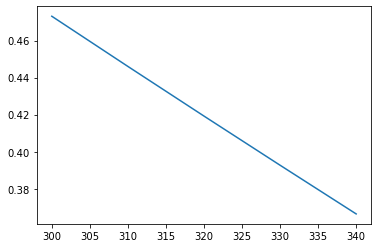

In [58]:
plt.plot(q,A1v)

In [21]:
A1v, t1v
# q1 = 0.5
# A10 = np.pi/4
# t10 = np.pi/4

(array([[ 813.21187592],
        [-271.45808574]]),
 array([0.78539816, 0.78539816]))